    Instructor(s): Dr. Kenneth Duru
    First Semester 2019
    Mathematical Sciences Institute
    Australian National University
    
# Math3511/6111, Scientific Computing

This Lab book must be submitted by **6th May 5pm**. Late Submissions will
incur a 5% penalty per working day. Assignment submissions will close on the **13th May 5pm**. Submissions after this time will be invalid.

# Lab 3: Interpolation

## A. Background
### A1. Summary

In this lab you will explore the efficient evaluation of the polynomial interpolant using the barycentric formula. You will learn about the barycentric formula and Scipy routine for barycentric interpolation. Background required are the lectures in the file Interpolation on Wattle up to the Lagrange formula.

The barycentric formula will be derived in the tutorial, alternatively, you can read up on it yourself using a search of the term barycentric formula.

Your tasks are to implement the barycentric formula in Python. You will measure the performance using the Python timeit tool. Finally, you will provide code which utilises the Scipy barycentric interpolation codes. Compare the performance of your codes and the Scipy codes. For extra points provide some discussion on the difference in performance of the Scipy and your code.

* starting point: Lagrangian interpolation formula for the data $x_i, y_i$ with $i=0,\ldots,n$
$$p(x) = \sum_{j=0}^n y_j l_j(x)$$

* barycentric interpolation formula
$$p(x) = \frac{\sum_{j=0}^n y_j \frac{c_j}{x-x_j}}{\sum_{j=0}^n \frac{c_j}{x-x_j}}$$
  which holds for $x\neq x_j$ for $j=0,\ldots,n$

For those who would like to get faster code we have included some **non-mandatory** material and coding ideas using Cython. Feel free to talk to the tutors to get further information about Cython. However, the Cython parts will not be assessed. Note that Cython might not work on the lab computers. Typically, you will install it yourself with Anaconda. However, you will require to use a C compiler which may cause additional problems on Macs and Windows computers.

### A2. Theory (by tutors)

* Lagrangian functions given in lecture satisfy
$$l_j(x) = w(x) \cdot \frac{c_j}{x-x_j}$$
    for $x\neq x_j$ and
    $$w(x) = \prod_{k=0}^n (x-x_k)$$
    and $c_j = \left(\prod_{k=0}^n (x_j-x_k)\right)^{-1}$
    
* Lagrangian functions satisfy for all $x$
$$\sum_{j=0}^n l_j(x) = 1$$

* Using these two properties of $l_j$ one then gets for the interpolant for $x\neq x_j$
$$p(x) = \frac{\sum_{j=0}^n y_j w(x) \frac{c_j}{x-x_j}}{\sum_{j=0}^n w(x) \frac{c_j}{x-x_j}}$$
from which the barycentric formula follows directly

### A3. Non-mandatory part on Cython (by tutors, on demand only)

* difference between Python and C:
    * Python is interpreted which C is compiled
    * Python uses dynamical typing while C uses static typing
* Cython is basically Python code
    * which is converted to C and then compiled
    * which includes a possibility of static typing
* Usage of Cython is easy with the %%cython magic of jupyter notebooks
    * load cython at the beginning with 
    
    ```python
    %load_ext cython
    ```
    * define a Cython cell with
    
    ```python
    %%cython
    ```
    (```%%cython -a``` for annotation)
    
    * use ordinary Python code in the Cython cell
    * add static typing with commmands like
    
    ```python
    cdef int i,n
    cdef numpy.ndarray[numpy.float64_t, ndim=1] x
    ```
    
    * import numpy data for Cython and Python by
    ```python
    import numpy    
    cimport numpy
    ```

In [2]:
%load_ext cython

In [3]:
%%cython -a
### Example of a Cython cell (tutors)

import numpy
cimport numpy

def addC(numpy.ndarray[numpy.float64_t,ndim=1] x, numpy.ndarray[numpy.float64_t,ndim=1] y):
    # Python code with static typing, compiled
    cdef int i
    cdef int n = x.shape[0]
    cdef numpy.ndarray[numpy.float64_t,ndim=1] z = numpy.zeros(n)
    for i in range(n):
        z[i] = x[i] + y[i]
    return z
    
def addP(x,y):   # Python code with dynamic typing, compiled
    n = x.shape[0]
    z = numpy.zeros(n)
    for i in range(n):
        z[i] = x[i] + y[i]
    return z

x = numpy.array((2.0, 11, 100))
y = numpy.array((3.0, 17, 2))
z = addC(x,y)
print(z)

[   5.   28.  102.]


In [35]:
# timing (tutors)
from numpy.random import random
x = random(20000)
y = random(20000)
%timeit z = addP(x,y)
%timeit z = addC(x,y)
%timeit z = x+y    # numpy code

18.4 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
151 µs ± 487 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.3 µs ± 2.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## B. Labbook -- here comes the part which you include or modify (student)

### B1. Lagrange interpolation  (student) [40pts]

1. In the next 2 cells you find an implementation of the Lagrange interpolation formula and a timing and accuracy study. Carefully read through the code until you understand what is going on. Write a short description on what the various procedures do. Then run the next cell multiple times. Discuss what you observe in terms of accuracy and time. Develop a simple model for the time spent in the various routines. Does this explain the growth of time with increasing n? 

  Note that you can improve the performance of the Lagrangian function by precomputing the (constant) denominator. How much does this save you?

  Write your report (1/2 page) here:

### My report

Your discussion goes here

what the various procedures do:

In the following code:

First, we input the data points of exponential function with equal.

Second, we define the caridnal function(langrangua function) by the formula:
$$l_j(x) = w(x) \cdot \frac{c_j}{x-x_j}$$
    for $x\neq x_j$ and
    $w(x) = \prod_{k=0 k\neq j}^n (x-x_k)$
    and $c_j = \left(\prod_{k=0}^n (x_j-x_k)\right)^{-1}$
    

Third, we perfrom lagrangian interpolation
$$p(x) = \sum_{j=0}^n y_j l_j(x)$$

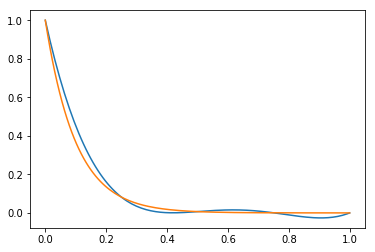

In [1]:
%matplotlib inline
import numpy
import pylab as plt

#data
n = 5
xpts = numpy.linspace(0,1,n)
f = lambda x: numpy.exp(-10*x)
ypts = f(xpts)

'''
# improved Lagrangian function
d=numpy.zeros(n)
for i in range(n):
    if (i != j):
        d[j] *= (xpts[j]-xpts[i])
            
def l(x, xpts, j):
    y = 1.0
    d = 1.0
    n = xpts.shape[0]
    for i in range(n):
        if (i != j):
            d *= (xpts[j]-xpts[i])
    for i in range(n):
        if (i != j): 
            y *= (x-xpts[i])
    y=y/d[j]
    return y
'''

# Lagrangian function
def l(x, xpts, j):
    y = 1.0
    n = xpts.shape[0]
    for i in range(n):
        if (i != j): 
            y *= (x-xpts[i])/(xpts[j]-xpts[i])
    return y

# Lagrangian interpolant
def p(x, xpts=xpts, ypts=ypts, l=l):
    y = 0.0
    n = xpts.shape[0]
    for j in range(n):
        y += ypts[j]*l(x,xpts,j)
    return y

# plot result
xg = numpy.linspace(0,1,128)
yg = p(xg)
plt.plot(xg,yg,xg,f(xg));

In [36]:
# timing and accuracy study 
from numpy.random import random
x = random()
print(x, f(x))

for n in  (3, 5, 9, 17, 33, 65):
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)

    print("n= ", n, " p(x) - f(x) = ", p(x,xpts,ypts) - f(x))
    
    %timeit y = p(x,xpts,ypts)

0.9289107503866519 9.242551289317041e-05
n=  3  p(x) - f(x) =  -0.05925835920813797
15 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
n=  5  p(x) - f(x) =  -0.024831423960763148
42.7 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n=  9  p(x) - f(x) =  -0.0005053421039129846
142 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n=  17  p(x) - f(x) =  8.360079957676122e-10
508 µs ± 34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
n=  33  p(x) - f(x) =  6.209022553917143e-14
1.98 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
n=  65  p(x) - f(x) =  8.501533292017865e-08
6.8 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


performance in time

0.2702047026725797 0.06706808196927055


C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0,0.5,'time')

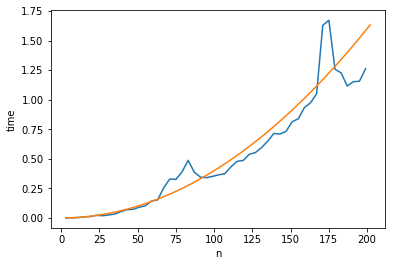

In [27]:
import timeit as ti
import time
x = random()
print(x, f(x))
N=10
T=[]
Narr= numpy.linspace(3,199,50)
for n in Narr:
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)
    y = p(x,xpts,ypts)
    T.append(ti.timeit('y = p(x,xpts,ypts)',
                 setup='from __main__ import p,x,xpts,ypts',number=20))
plt.plot(Narr,T)
n=numpy.linspace(3, 202, 200)
y = 4e-5*n**2
plt.plot(n,y)
plt.xlabel('n')
plt.ylabel('time')

performance in accuracy

0.808336483651065 0.0003086307941147965


C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0,0.5,'error')

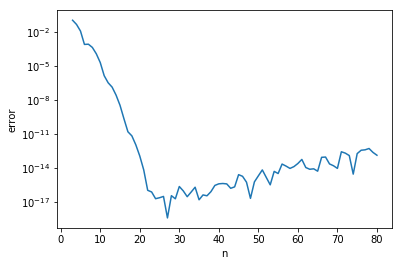

In [48]:
x = random()
print(x, f(x))

y=[]

Narr= numpy.linspace(3,80,78)

for n in Narr:
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)
    yy = numpy.abs(p(x,xpts,ypts) - f(x))
    y.append(yy)
plt.plot(Narr,y)
plt.yscale("log")
plt.xlabel('n')
plt.ylabel('error')

We observe that:

The first plot show us that T=$4\times10^{-5} n^2$ is a good fit of the relationship between calculation time and n. And we can see that the calculation time is of order $n^2$.

The second plot show us that the error reaches its minimum at around 27, which means the accuaracy of the calculation is best when n is around 27.

a simple model for the time spent in the various routines:

The time spent in every calculate langrangian function needs n division and n-1 multiplication. 

The time spent in intepolation needs to calculate n+1 langrangian function.

The total calculation time is roughly $2n^2 t_0$, where $t_0$  is the single calculation time for multiplication or division. 


By precomputing the (constant) denominator:

If we want to calculate the intepolation function in a region of x. Then when calculating the langrangian function for all values of x, the constant denominators are not changed for every x, so we can calculate them in advance. Then the time spent in calculate langrangian function will be roughly half beacuse we do not need to do n division but just 1. Hence the whole calculating time will be half compared to the previous method.

### B2. Performance improvement using Cython (**not assessed**, student)

Most of the time spent in Lagrangian interpolation is spent in evaluating the Lagrange functions l(x,y,j).
* Can you confirm this with your model?

Use Cython to improve performance, first by only including compilation and in a second step by adding static typing. Redo the timings by using the two new Cython variants of the Lagrange functions. Compare the performance with the pure Python performance. Note that you do not need to change the code for the interpolation function p.

### My report

your discussion of the results and your code goes here

In [38]:
# Your Cython code goes here for the compiling only variant (not assessed)

In [39]:
# Your timing code goes here (not assessed)

In [40]:
# Your Cython code goes here for the compiling + static typing code (not assessed)

In [41]:
# Your timing code goes here (not assessed)

### B3. Barycentric formula (student) [30pts]

2. Repeat the performance study from point 1 replacing the Lagrange formula with the barycentric formula.
  Observe how the performance changes. Use a pure Python implementation. Your results are to be included here like in point 1.

  Note that here there are two components to the performance
    * for the computation of the coefficients $c_j$
    * for the evaluation of the polynomial with given $c_j$

what the various procedures do:

In the following code:

First, we input the data points of exponential function with equal.

Second, we calculate $c_j$ by the formula:
$c_j = \left(\prod_{k=0}^n (x_j-x_k)\right)^{-1}$
    

Third, we perfrom Barycentric formula:
$$p(x) = \frac{\sum_{j=0}^n y_j \frac{c_j}{x-x_j}}{\sum_{j=0}^n \frac{c_j}{x-x_j}}$$

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


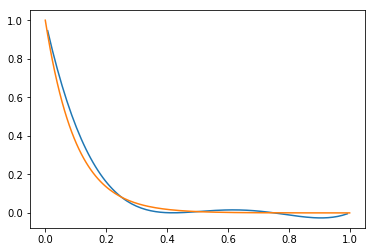

In [26]:
%matplotlib inline
import numpy
import pylab as plt

#data
n = 5
xpts = numpy.linspace(0,1,n)
f = lambda x: numpy.exp(-10*x)
ypts = f(xpts)

#c_j
def c(x, xpts, j):
    y = 1.
    n = xpts.shape[0]
    for i in range(n):
        if (i != j):
            y *= (xpts[j]-xpts[i])
    y=1/y
    return y



# Barcentric interpolant
def b(x, xpts=xpts, ypts=ypts, l=l):
    y = 0.0
    d = 0.0
    n = xpts.shape[0]
    cc = numpy.zeros(n)
    for j in range(n):
        cc[j] = c(x,xpts,j)
    for j in range(n):
        y += ypts[j]*cc[j]/(x-xpts[j])
    for j in range(n):
        d += cc[j]/(x-xpts[j])
    y = y/d
    return y

# plot result
xg = numpy.linspace(0,1,128)
yg = b(xg)
plt.plot(xg,yg,xg,f(xg));

In [10]:
# timing and accuracy study 

x = random()
print(x, f(x))

for n in  (3, 5, 9, 17, 33, 65):
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)

    print("n= ", n, " b(x) - f(x) = ", b(x,xpts,ypts) - f(x))
    
    %timeit y = b(x,xpts,ypts)

0.0650774212793307 0.521641758660128
n=  3  b(x) - f(x) =  0.29323335918847604
26.4 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
n=  5  b(x) - f(x) =  0.08797347251311394
51.2 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n=  9  b(x) - f(x) =  0.001310196727692059
128 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n=  17  b(x) - f(x) =  -5.162064109498488e-10
322 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
n=  33  b(x) - f(x) =  4.667377595524158e-13
1.16 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
n=  65  b(x) - f(x) =  1.0048724943256815e-06
4.31 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


performance in time

0.761234354879148 0.0004943120555604486


C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


Text(0,0.5,'time')

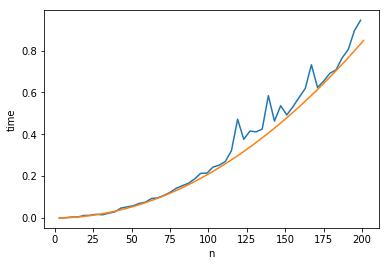

In [32]:
x = random()
print(x, f(x))
T=[]
Narr= numpy.linspace(3,199,50)
for n in Narr:
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)
    y = b(x,xpts,ypts)
    T.append(ti.timeit('y = b(x,xpts,ypts)',
                 setup='from __main__ import b,x,xpts,ypts',number=20))
plt.plot(Narr,T)
n=numpy.linspace(3, 201, 100)
y = 2.1e-5*n**2
plt.plot(n,y)
plt.xlabel('n')
plt.ylabel('time')

performance in accuracy

0.15288993785390115 0.21677412231879992


C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0,0.5,'error')

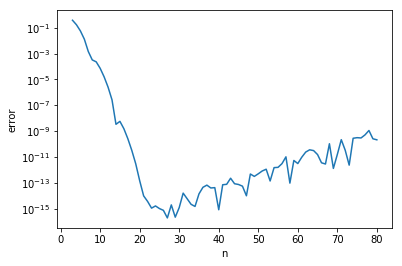

In [50]:
x = random()
print(x, f(x))

y=[]

Narr= numpy.linspace(3,80,78)

for n in Narr:
    xpts = numpy.linspace(0,1,n)
    ypts = f(xpts)
    yy = numpy.abs(b(x,xpts,ypts) - f(x))
    y.append(yy)
plt.plot(Narr,y)
plt.yscale("log")
plt.xlabel('n')
plt.ylabel('error')

We observe that:

The first plot show us that T=$2.1\times10^{-5} n^2$ is a good fit of the relationship between calculation time and n. And we can see that the calculation time is of order $n^2$.

The second plot show us that the error reaches its minimum at around 27. The accuaracy of the calculation is best when n is around 27.

Comparison between lagrangian formula with baycentric formula:

For the computation of the coefficients $c_j$: there are n multiplication and 1 division.

For the evaluation of the intepolation: we have to calculate n+1 $c_j$

The total calculation time is roughly $n^2 t_0$. The time required for computation is nearly the half the time of time of previous method.

The performance of accuracy has not changed much.

### B4. Barycentric formula with Cython (student, not assessed)

Repeat the performance study from point 2 for the barycentric formula, again considering both the effect of compilation and of static typing separately.